# <center>Intelligent Resume Matching System with NLP and Machine Learning </center>

### Introduction to the Code

This project, aims to predict the suitability of resumes for specific job roles using machine learning techniques. The workflow involves loading and preprocessing the dataset, conducting exploratory data analysis (EDA) to uncover key patterns, engineering features to enhance model performance, and addressing potential class imbalances. Various machine learning models are trained and evaluated to ensure robust predictions, with the best-performing model saved for deployment. 

### Part 1: Data Collection
In this section, we will collect all relevant data from several sources using Python. We will start by importing several relevant Python libraries for this study.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/saanika/Downloads/Dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/Users/saanika/Downloads/Dataset/postings.csv
/Users/saanika/Downloads/Dataset/.DS_Store
/Users/saanika/Downloads/Dataset/Resume/Resume.csv
/Users/saanika/Downloads/Dataset/mappings/skills.csv
/Users/saanika/Downloads/Dataset/mappings/industries.csv
/Users/saanika/Downloads/Dataset/jobs/benefits.csv
/Users/saanika/Downloads/Dataset/jobs/salaries.csv
/Users/saanika/Downloads/Dataset/jobs/job_industries.csv
/Users/saanika/Downloads/Dataset/jobs/job_skills.csv
/Users/saanika/Downloads/Dataset/data/.DS_Store
/Users/saanika/Downloads/Dataset/data/data/AGRICULTURE/37201447.pdf
/Users/saanika/Downloads/Dataset/data/data/AGRICULTURE/12674256.pdf
/Users/saanika/Downloads/Dataset/data/data/AGRICULTURE/29968330.pdf
/Users/saanika/Downloads/Dataset/data/data/AGRICULTURE/81042872.pdf
/Users/saanika/Downloads/Dataset/data/data/AGRICULTURE/20006992.pdf
/Users/saanika/Downloads/Dataset/data/data/AGRICULTURE/15603319.pdf
/Users/saanika/Downloads/Dataset/data/data/AGRICULTURE/17499196.pdf
/Users/saanika

The first step of the project involves setting up the environment and exploring the dataset directory to locate the required files for analysis. We begin by importing essential libraries such as numpy for numerical computations and pandas for data processing and CSV file handling.  The code snippet uses os.walk() to iterate through all files and subdirectories, printing their full paths. This step is crucial for verifying the presence of the necessary files and preparing the workspace for further data processing and analysis. Additionally, it lays the foundation for efficiently managing the input and output files throughout the project workflow.

In [2]:
df = pd.read_csv('/Users/saanika/Downloads/Dataset/Resume/Resume.csv')

The next step involves loading the dataset into the environment for further processing. Using the `pandas` library, the dataset is read from the specified file path (`localdirectory/Downloads/Dataset/Resume/Resume.csv`) into a DataFrame named `df`. This allows for easy manipulation, exploration, and analysis of the data.
The `pd.read_csv()` function is used to load the dataset, which is in CSV format. 

### Part 2: Data Cleaning, Exploratory Data Analysis (EDA) & Visualizing the Resume Dataset Distribution

Once we have collected our data, the next crucial step is to clean and prepare it for analysis or modeling. This process typically involves:

- **Eliminating irrelevant data**: Removing columns or rows that do not contribute to the analysis.  
- **Addressing missing values**: Filling in blanks with appropriate values or excluding incomplete records.  
- **Standardizing data formats**: Ensuring consistency across entries, such as using uniform date formats or aligning categorical labels.  
- **Feature engineering**: Creating new, meaningful features from the existing data, such as calculating averages or defining groupings.  

Data cleaning is closely intertwined with **Exploratory Data Analysis (EDA)**, as both processes work together to enhance our understanding of the dataset. EDA often reveals patterns, outliers, or trends that inform necessary adjustments during cleaning.

In [3]:
import nltk
import pandas as pd
from PyPDF2 import PdfReader
from nltk import pos_tag, sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
import re
from tqdm import tqdm
from transformers import AutoModel, AutoTokenizer
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from nltk.probability import FreqDist
from wordcloud import WordCloud
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
import re
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from transformers import pipeline




# Download the required NLTK resources
nltk.download('punkt')  # Corrected name
nltk.download('stopwords')  # Already correct
nltk.download('averaged_perceptron_tagger')  # Corrected name


[nltk_data] Downloading package punkt to /Users/saanika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saanika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/saanika/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In this step, we import the necessary libraries and tools required for natural language processing (NLP), machine learning (ML), data analysis, and visualization. Key libraries include NLTK, which facilitates tokenization, stopword removal, and part-of-speech tagging, and PyPDF2, which is used for extracting text from PDF files. The Transformers library from Hugging Face provides access to pre-trained NLP models for tasks like text generation and sequence-to-sequence modeling, while Scikit-learn supports vectorization, dimensionality reduction, and machine learning model development. Additional tools like Gensim enable Word2Vec modeling and topic extraction, and visualization libraries such as Matplotlib and Seaborn are used for creating insightful plots and charts. 

In [4]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


By running `df.head()`, the user can view the column names, the data types of the entries, and the general layout of the dataset. This step is crucial for verifying that the data has been loaded correctly from the CSV file and for gaining a basic understanding of the dataset's structure and content before performing further analysis or processing.

In [5]:
resume_data = pd.read_csv('/Users/saanika/Downloads/Dataset/Resume/Resume.csv')
resume_data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In this step, we load the resume dataset into a pandas DataFrame for analysis and manipulation. The dataset is accessed using the `pd.read_csv()` function, which reads the CSV file located at `/localdirectory/Downloads/Dataset/Resume/Resume.csv`. Once the data is loaded, the `head()` method is used to display the first few rows of the dataset, providing an initial glimpse into its structure and content.
This step is crucial for understanding the format of the data, identifying its columns, and verifying its content. Previewing the data helps to ascertain whether it is ready for analysis or requires preprocessing, such as handling missing values, renaming columns, or cleaning the text data.
By loading and reviewing the dataset, we establish a clear understanding of its structure, ensuring a solid foundation for subsequent data cleaning, exploration, and feature extraction.

In [6]:
resume_data.describe().T
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In this step, we perform an initial exploration of the dataset to understand its structure and key statistical properties. The describe() method is used to generate a statistical summary of the numerical columns, including metrics such as count, mean, standard deviation, minimum, and maximum values. Transposing the output (.T) ensures the summary is presented in a clear and readable format, with columns listed vertically for easier interpretation. Additionally, the info() method provides a concise overview of the dataset, detailing the number of rows and columns, data types of each column, and the count of non-null values.

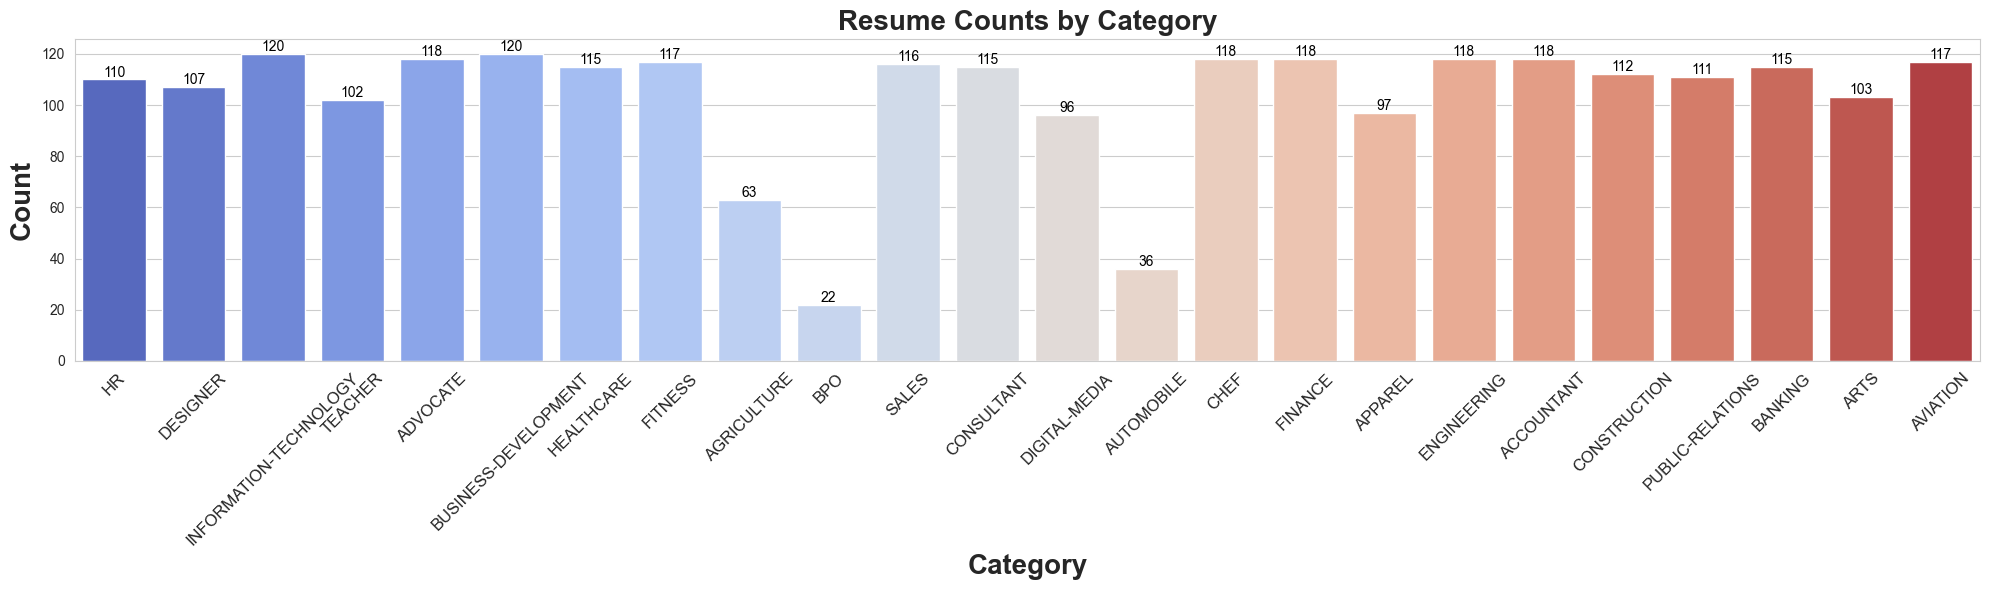

In [7]:
# Set a custom style and color palette
sns.set_style("whitegrid")
custom_palette = sns.color_palette("coolwarm", len(resume_data["Category"].unique()))  # Adjust color palette for unique categories

# Set up the figure size and rotation for x-ticks
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45, fontsize=12)

# Create a count plot with the custom palette and use `hue` parameter
ax = sns.countplot(x="Category", data=resume_data, hue="Category", palette=custom_palette, dodge=False, legend=False)

# Annotate each bar with its height (the count value)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add gridlines and adjust title/labels
plt.title("Resume Counts by Category", fontsize=20, fontweight='bold')
plt.ylabel("Count", fontsize=20, fontweight='bold')
plt.xlabel("Category", fontsize=20, fontweight='bold')

# Make x-axis labels readable and visually appealing
plt.tick_params(axis='x', which='major', labelsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In this step, we create a customized bar chart to visualize the distribution of resumes across various categories in the dataset. This visualization provides insights into the number of resumes available for each category, helping to identify any imbalances in the dataset. Using Seaborn's `countplot()` function, we plot the categories on the x-axis and their corresponding counts on the y-axis. Each bar is annotated with its height (count value) to enhance readability and provide precise numeric information.  
This step is crucial for understanding the distribution of resumes across categories, allowing us to identify overrepresented or underrepresented classes that may influence the modeling process. 

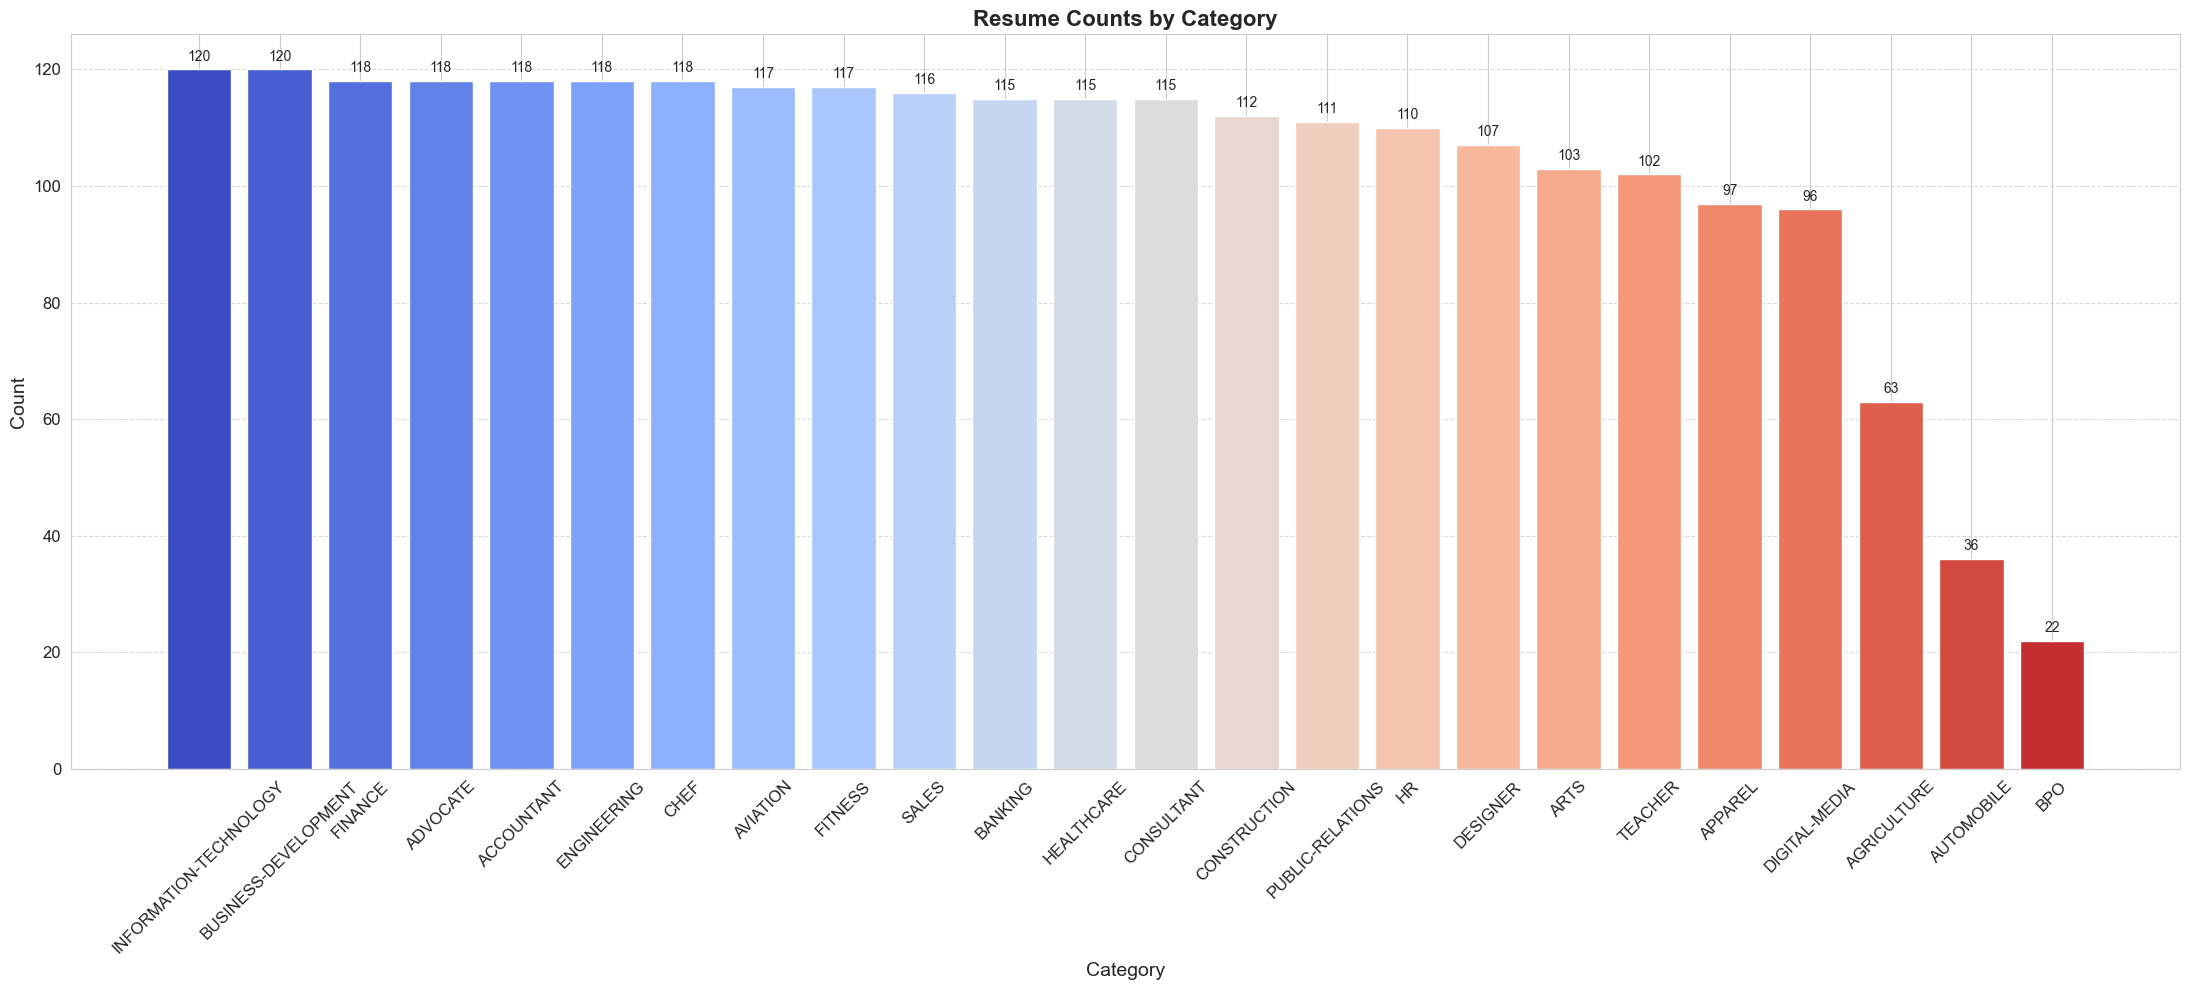

In [8]:
# Get category counts and labels
targetCounts = resume_data['Category'].value_counts()
targetLabels = targetCounts.index  # Ensures labels align with counts

# Create a figure
plt.figure(1, figsize=(22, 10))
the_grid = GridSpec(1, 1)

# Generate a colormap
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i / len(targetCounts)) for i in range(len(targetCounts))]

# Plot the bar chart
plt.subplot(the_grid[0, 0], title='Category Distribution')
bars = plt.bar(targetLabels, targetCounts, color=colors)

# Annotate each bar with its height (the count value)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, 
             f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

# Customize chart appearance
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Resume Counts by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In this step, we create a bar chart to visualize the distribution of resume counts across different categories in the dataset, further enhancing our understanding of its composition. Using `value_counts()`, we calculate the number of resumes for each category, ensuring that the labels align correctly with their corresponding counts.
The bar chart is plotted using Matplotlib, with annotations added above each bar to display the exact count values for clarity. 

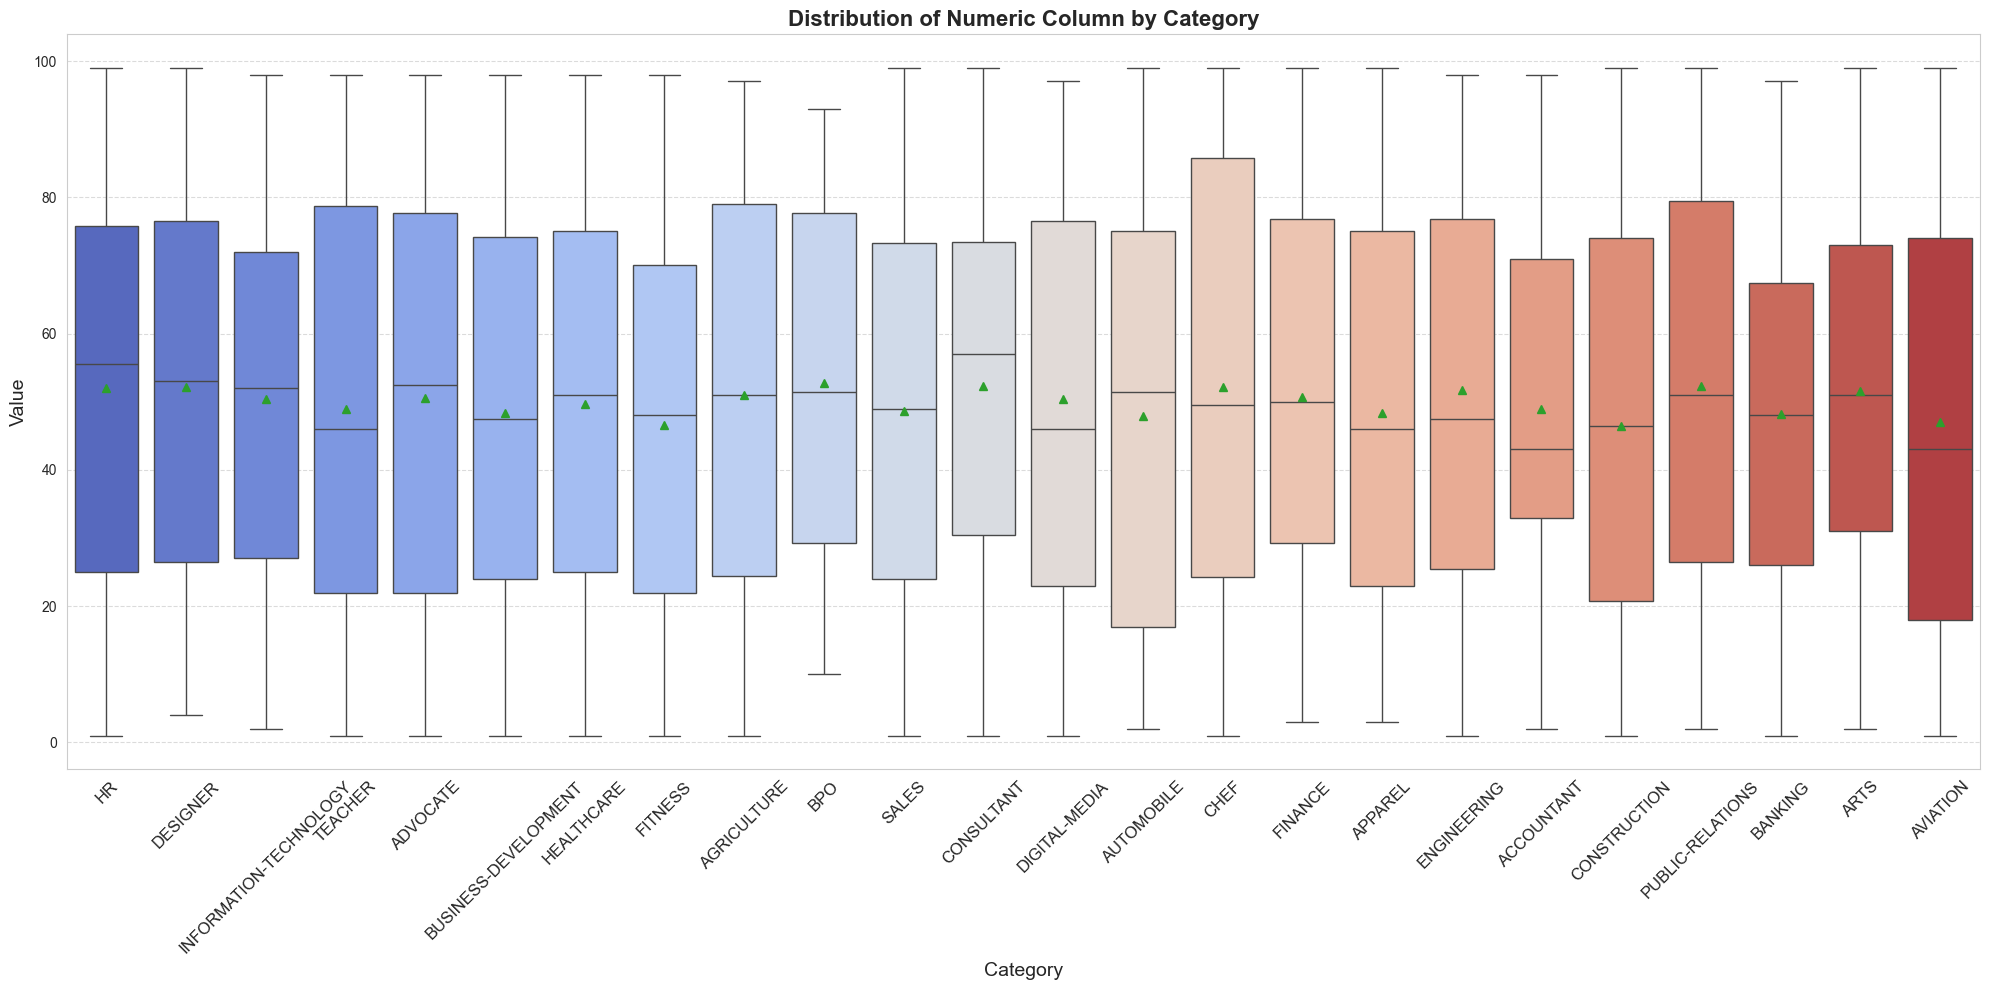

In [9]:
# Ensure there is a numeric column in the dataset for the box plot
# Replace 'Numeric_Column' with the actual numeric column in your dataset
if 'Numeric_Column' not in resume_data.columns:
    # Add a mock numeric column for demonstration purposes
    import numpy as np
    resume_data['Numeric_Column'] = np.random.randint(1, 100, size=len(resume_data))

# Create the box plot
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")

sns.boxplot(
    x='Category', 
    y='Numeric_Column', 
    data=resume_data, 
    hue='Category',  # Assign the x variable to `hue`
    palette='coolwarm', 
    dodge=False,  # Ensure no splitting of groups
    showmeans=True  # Optionally display means for clarity
)

# Customize the plot
plt.title('Distribution of Numeric Column by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In this step, a box plot is created to visualize the distribution of a numeric variable across different categories in the dataset. Since the dataset might not contain a numeric column suitable for this purpose, a mock numeric column (`Numeric_Column`) is added using randomly generated integer values for demonstration. This ensures that the box plot can effectively highlight variations within and between categories. Using Seaborn's `boxplot()` function, the numeric column is plotted along the y-axis, while the categories are displayed on the x-axis. 

In [10]:
resume_data = resume_data.drop(["Resume_html"], axis=1)
resume_data.head()

,ID,Resume_str,Category,Numeric_Column
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,72
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,58
2,33176873,HR DIRECTOR Summary Over 2...,HR,25
3,27018550,HR SPECIALIST Summary Dedica...,HR,1
4,17812897,HR MANAGER Skill Highlights ...,HR,29


In this step, the `Resume_html` column is removed from the dataset using the `drop()` function in pandas. This column, which likely contains HTML-formatted text, may not be directly useful for the analysis or modeling processes and is removed to streamline the dataset. By specifying `axis=1`, the operation targets a column rather than rows.

### Functions for processing the resumes from the pdf files and preprocessing

In [11]:
def extract_text_from_pdf(file_path):
    reader = PdfReader(file_path)
    text = "".join(page.extract_text() for page in reader.pages)
    return text

In this step, a custom function, `extract_text_from_pdf()`, is defined to extract text content from PDF files. The function utilizes the `PdfReader` class from the PyPDF2 library to read the specified PDF file. It iterates over all the pages in the document, extracts text from each page using the `extract_text()` method, and combines the content into a single string.

In [12]:
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    sentences = sent_tokenize(text)
    features = {'feature': ""}
    stop_words = set(stopwords.words("english"))
    for sent in sentences:
        if any(criteria in sent for criteria in ['skills', 'education']):
            words = word_tokenize(sent)
            words = [word for word in words if word not in stop_words]
            tagged_words = pos_tag(words)
            filtered_words = [word for word, tag in tagged_words if tag not in ['DT', 'IN', 'TO', 'PRP', 'WP']]
            features['feature'] += " ".join(filtered_words)
    return features

In this step, a function named `preprocess_text` is defined to process and extract specific features from a given block of text. The function is designed to clean and filter the text, focusing on sentences related to criteria like "skills" and "education," which are common in resumes.
The function starts by removing all non-alphabetic characters from the input text using `re.sub('[^a-zA-Z]', ' ', text)`, replacing them with spaces. This ensures that the text consists only of alphabetic characters. Next, the text is converted to lowercase for uniformity. The `sent_tokenize` function is used to split the text into sentences, making it easier to analyze sentence by sentence.
A dictionary named `features` is initialized to store the extracted and processed text. Stopwords, such as "the" or "and," which are commonly used but carry little meaning, are removed using the `stopwords.words("english")` list. The function then iterates over each sentence, checking if it contains key terms like "skills" or "education" using the condition `if any(criteria in sent for criteria in ['skills', 'education'])`. If a sentence matches this criterion, it undergoes further processing.
The words in the sentence are tokenized using `word_tokenize`, and stopwords are removed. The remaining words are tagged with their parts of speech using `pos_tag`. Only words that are not determiners (DT), prepositions or subordinating conjunctions (IN), "to" (TO), personal pronouns (PRP), or wh-pronouns (WP) are retained. These filtered words are concatenated into a single string and appended to the `features['feature']` key.
Finally, the function returns the `features` dictionary, which contains the processed and filtered text. This function is designed for extracting meaningful and relevant content from resumes or other documents, focusing on specific criteria to aid in tasks like resume filtering, feature extraction, or text classification.

In [13]:
def process_resume_data(df):
    id = df['ID']
    category = df['Category']
    text = extract_text_from_pdf(f"/Users/saanika/Downloads/Dataset/data/data/{category}/{id}.pdf")
    features = preprocess_text(text)
    df['Feature'] = features['feature']
    return df

In this step, a function named `process_resume_data` is defined to process individual resumes in the dataset and extract specific features from them. The function takes a Pandas DataFrame, `df`, as its input and performs the following operations:
1. **Extract ID and Category**:  
   The `ID` and `Category` columns from the DataFrame are extracted into variables `id` and `category`, respectively. These columns provide the unique identifier for each resume and its associated category, which are used to locate and process the corresponding PDF file.
2. **Extract Text from the PDF**:  
   The function constructs the file path for the resume's PDF using the `ID` and `Category` values. The `extract_text_from_pdf()` function is called with this file path, extracting the raw text content from the specified PDF.
3. **Preprocess the Extracted Text**:  
   The extracted text is passed to the `preprocess_text()` function to clean, tokenize, and extract meaningful content based on specific criteria (e.g., "skills" or "education"). This function returns a dictionary, `features`, containing the processed text.
4. **Add Features to the DataFrame**:  
   The processed features are added as a new column, `Feature`, in the original DataFrame, storing the extracted information for further analysis.
5. **Return the Updated DataFrame**:  
   Finally, the function returns the updated DataFrame, now enriched with an additional column containing extracted features from the resume text.
This function is designed to streamline the workflow of processing resumes stored in PDF format, extracting valuable information, and integrating it into the dataset for tasks such as classification, analysis, or matching.

In [14]:
def get_embeddings(text, model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    inputs = tokenizer(str(text), return_tensors="pt", truncation=True, padding=True).to(device)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().to("cpu").numpy()
    return embeddings

The `get_embeddings` function is designed to generate embeddings, or vector representations, for a given text using a pre-trained language model. It takes two inputs: the `text` to be encoded and the `model_name`, which specifies the pre-trained model to be used (e.g., BERT or other Hugging Face transformer models). First, the function loads the corresponding tokenizer using `AutoTokenizer.from_pretrained(model_name)`. This tokenizer processes the input text into tokenized sequences suitable for the model's input format. During tokenization, `truncation=True` ensures that overly long text is truncated, while `padding=True` ensures that all tokenized sequences are of uniform length. The tokenized inputs are returned as PyTorch tensors (`return_tensors="pt"`) and moved to the computation device, such as a GPU or CPU, using `.to(device)`.
The tokenized inputs are then passed to the pre-trained model, which generates output representations. The model's `last_hidden_state`, which contains token-level embeddings, is extracted. These embeddings represent the semantic meaning of each token in the input text. To condense the token-level information into a single vector representation for the entire text, mean pooling is applied, where the embeddings are averaged across the sequence dimension (`mean(dim=1)`).
The resulting embeddings are then detached from the computation graph using `.detach()`, moved back to the CPU (`to("cpu")`), and converted into a NumPy array (`numpy()`) for ease of use in downstream tasks. The function finally returns the computed embeddings, which can be used for a variety of purposes, such as text classification, similarity analysis, clustering, or as input features for machine learning models. This function is essential for leveraging the power of pre-trained language models to extract meaningful numerical representations of text data.

In [15]:
def print_top_matching_resumes(result_group):
    for i in range(15):
        print("\nJob ID:", i)
        print("Cosine Similarity | Domain Resume | Domain Description")
        print(result_group.get_group(i)[['similarity', 'domainResume', 'domainDesc']])

The `print_top_matching_resumes` function is designed to display the top matching resumes for specific job IDs based on their similarity scores. It takes one argument, `result_group`, which is expected to be a grouped DataFrame where resumes and job descriptions are grouped by job IDs. 
Inside the function, a loop iterates over a range of job IDs, specifically from 0 to 14, as indicated by the `range(15)`. For each job ID, the function prints the ID alongside a header row, `Cosine Similarity | Domain Resume | Domain Description`, to provide context for the displayed information. It then retrieves and prints the subset of data corresponding to the current job ID using `result_group.get_group(i)`. This grouped data contains columns such as `similarity`, which represents the cosine similarity score between resumes and job descriptions, `domainResume`, which contains the relevant resume data, and `domainDesc`, which contains the related job description.
The function is particularly useful for quickly reviewing how well resumes match job descriptions for various job IDs based on similarity scores. This facilitates the evaluation of the resume matching process, allowing insights into the quality of matches and the performance of the similarity measurement approach.

### Preprocessing

In [16]:
#resume_data.head()
#Identify Duplicates in the Dataset
resume_data.duplicated(subset=['Resume_str']).value_counts()

False    2482
True        2
Name: count, dtype: int64

In this step, the code checks for duplicate entries in the `resume_data` DataFrame based on the `Resume_str` column, which likely contains the text data of resumes. This is done using the `duplicated()` method with the `subset=['Resume_str']` argument, which identifies rows that have the same value in the `Resume_str` column as another row in the dataset. The `value_counts()` function is then applied to count the occurrences of `True` (indicating duplicates) and `False` (indicating unique rows).
The purpose of this step is to identify and quantify duplicate entries in the dataset, which is an essential part of data cleaning. Duplicate entries can skew analysis and model training, so identifying them is a prerequisite for deciding whether to remove or handle them appropriately. This check provides insight into the dataset's integrity and helps maintain its quality for further processing.

In [17]:
#remove the duplicates from the dataset
resume_data = resume_data.drop_duplicates(subset=['Resume_str'], keep='first')
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2482 entries, 0 to 2482
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2482 non-null   int64 
 1   Resume_str      2482 non-null   object
 2   Category        2482 non-null   object
 3   Numeric_Column  2482 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 97.0+ KB


In this step, the code removes duplicate entries from the `resume_data` DataFrame based on the `Resume_str` column, ensuring that each resume's text data is unique. The `drop_duplicates()` method is used with the `subset=['Resume_str']` argument, which specifies that duplicates should be identified only based on the `Resume_str` column. The parameter `keep='first'` ensures that only the first occurrence of each duplicate is retained, while subsequent duplicates are dropped.
After removing duplicates, the `resume_data.info()` method is called to display a summary of the updated DataFrame.

In [18]:
resume_data.head()

,ID,Resume_str,Category,Numeric_Column
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,72
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,58
2,33176873,HR DIRECTOR Summary Over 2...,HR,25
3,27018550,HR SPECIALIST Summary Dedica...,HR,1
4,17812897,HR MANAGER Skill Highlights ...,HR,29


In this step, the `head()` method is called on the `resume_data` DataFrame to display the first five rows of the dataset. This is a common exploratory step used to quickly verify the current state of the data after performing transformations or cleaning operations, such as the removal of duplicates in the previous step. By inspecting these initial rows, the user can confirm that the dataset is structured correctly and that key columns, such as `Resume_str`, are intact and free of duplicates. This step helps ensure that the dataset is ready for subsequent analysis or processing.

In [ ]:
resume_data = resume_data.apply(process_resume_data, axis=1)
resume_data.head()

In this step, the code applies the `process_resume_data` function to each row of the `resume_data` DataFrame using the `apply()` method with `axis=1`. This configuration ensures that the function operates on individual rows, allowing it to process the data row by row.
The `process_resume_data` function is expected to perform several tasks for each row, such as extracting the resume text from a PDF file, preprocessing the text to extract meaningful features, and adding these features back into the DataFrame. After the function is applied, the transformed DataFrame, now enriched with the processed data, is reassigned to `resume_data`.
Finally, the `head()` method is called again to display the first five rows of the updated DataFrame. This allows the user to verify that the `process_resume_data` function has been successfully applied and that the new features have been correctly added to the dataset. This step ensures that the resumes in the dataset are fully processed and ready for analysis or modeling tasks.

In [ ]:
resume_data = resume_data.drop(columns=['Resume_str'])
resume_data.head()

In this step, the `Resume_str` column is removed from the `resume_data` DataFrame using the `drop()` method with the `columns=['Resume_str']` argument. This operation permanently deletes the column, ensuring it is no longer part of the dataset. 
After removing the column, the updated DataFrame is reassigned to `resume_data`, and the `head()` method is called to display the first five rows of the transformed DataFrame. This allows the user to verify that the `Resume_str` column has been successfully removed and ensures that the dataset only retains the columns necessary for further analysis or processing.

In [ ]:
# Get the most common words
def print_most_frequent_words(text, top_n=50):
    words = nltk.word_tokenize(text)
    wordfreqdist = FreqDist(words)
    mostcommon = wordfreqdist.most_common(top_n)
    for word, freq in mostcommon:
        print(f"{word}: {freq}")

combined_text = " ".join(resume_data['Feature'].astype(str))
print_most_frequent_words(combined_text)

In this step, the `print_most_frequent_words` function is defined and utilized to identify and display the most common words in the processed resume data. The function takes two arguments: `text`, which is the input text to analyze, and `top_n`, which specifies the number of most frequent words to display (defaulting to 50).
Within the function, the input text is tokenized into individual words using `nltk.word_tokenize()`, creating a list of words. The `FreqDist` class from the `nltk` library is then used to compute the frequency distribution of these words, generating a mapping of each word to its occurrence count. The `most_common(top_n)` method retrieves the top `n` most frequent words along with their frequencies. These word-frequency pairs are then iterated over, and each word along with its frequency is printed in the format `word: frequency`.
The `combined_text` variable is created by combining all entries in the `Feature` column of the `resume_data` DataFrame into a single string. The `Feature` column, which contains the preprocessed and extracted features of the resumes, is converted to string format, and the entries are joined with a space separator. The resulting text is then passed to the `print_most_frequent_words` function to analyze and display the most common words across all resumes. This step is crucial for understanding the prominent terms in the dataset, which can provide insights into the data's content and relevance. 

In [ ]:
wc = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In this step, a word cloud is generated to visualize the most common words in the dataset, offering an intuitive and aesthetically pleasing representation of the text data. The word cloud provides a way to see the relative importance of terms based on their frequency, with more frequently appearing words displayed in larger font sizes.
This visualization provides a quick and impactful way to identify key terms and patterns in the text data, making it easier to understand the dataset's content at a glance. It can be particularly useful for identifying important keywords in resumes or job descriptions.

In [ ]:
company_industries = pd.read_csv("/Users/saanika/Downloads/Dataset/companies/company_industries.csv")
company_industries.head()

In this step, a new dataset, company_industries.csv, is loaded into a Pandas DataFrame named company_industries. The file is located at localdirectory/Dataset/companies/, and the pd.read_csv() function is used to read the data into the program.
After loading the dataset, the head() method is called to display the first five rows of the company_industries DataFrame. This provides a quick view of the structure and content of the dataset, including column names and sample data.
This step is likely the beginning of integrating company or industry-related data with the resume dataset for further analysis, such as mapping resumes to relevant industries or exploring company-specific trends. It ensures that the company_industries dataset is properly loaded and ready for subsequent operations.

In [ ]:
company_industries.info()

The `info()` method is used on the `company_industries` DataFrame to provide a concise summary of its structure, including the number of rows and columns, column names, data types, non-null value counts, and memory usage. This step helps in understanding the dataset's overall structure and identifying issues such as missing values or incorrect data types, ensuring the dataset is ready for analysis or integration with other data sources.

In [ ]:
desired_industries = ["IT Services and IT Consulting", "Financial Services", "Real Estate", "Banking"]

In this step, a list named `desired_industries` is created to specify industries of interest. This list includes the industries `"IT Services and IT Consulting"`, `"Financial Services"`, `"Real Estate"`, and `"Banking"`. These industries may be selected based on their relevance to the analysis or the specific focus of the project. This step serves as a filter or criteria for isolating data related to these industries in subsequent processing or analysis tasks.

In [ ]:
filtered_industries = company_industries[company_industries['industry'].isin(desired_industries)]
filtered_industries.info()

In this step, the dataset `company_industries` is filtered to include only the rows where the `industry` column matches one of the values specified in the `desired_industries` list. The `isin()` method is used to check whether each entry in the `industry` column belongs to the `desired_industries` list, and the resulting DataFrame is stored in `filtered_industries`.
The `info()` method is then called on the `filtered_industries` DataFrame to display a summary of the filtered data, including the number of rows and columns, column names, data types, and the count of non-null values in each column. This step helps confirm that the filtering process worked correctly and provides an overview of the subset of data that matches the desired industries.

In [ ]:
job_posts = pd.read_csv('/Users/saanika/Downloads/Dataset/postings.csv')
job_posts.head()

In this step, a dataset named `postings.csv`, located at `/localdirectory/Downloads/Dataset/`, is loaded into a Pandas DataFrame called `job_posts` using the `pd.read_csv()` function. This file likely contains job posting data relevant to the analysis. 
After loading the dataset, the `head()` method is called on the `job_posts` DataFrame to display the first five rows.

In [ ]:
job_posts = job_posts[["job_id","company_id","company_name","title","description","skills_desc"]]
job_posts.head()

In this step, the `job_posts` DataFrame is refined by selecting only specific columns that are relevant to the analysis. The code filters the DataFrame to include the following columns: `"job_id"`, `"company_id"`, `"company_name"`, `"title"`, `"description"`, and `"skills_desc"`. This operation reduces the dataset to contain only the necessary information for subsequent tasks, such as analyzing job postings, their descriptions, or required skills. After filtering, the `head()` method is called on the updated `job_posts` DataFrame to display the first five rows.

In [ ]:
job_posts["skills_desc"][12]

In this step, the code accesses the value in the `"skills_desc"` column of the `job_posts` DataFrame for the row at index `12`. This retrieves the specific skills description associated with the job posting at that index.
This operation is useful for inspecting a particular entry in the dataset to understand the format or content of the `skills_desc` field. It can help validate the data or provide insights into how skills are described in job postings, which may be relevant for tasks like matching resumes to job requirements or extracting key skills.

In [ ]:
job_descriptions = job_posts[["description","skills_desc","title","company_id"]]
job_descriptions.head()

In this step, a new DataFrame named `job_descriptions` is created by selecting specific columns from the `job_posts` DataFrame. The columns `"description"`, `"skills_desc"`, `"title"`, and `"company_id"` are included in this subset, focusing on job-related information such as the job description, required skills, job title, and associated company ID.
After creating the `job_descriptions` DataFrame, the `head()` method is called to display the first five rows. This step ensures that the subset contains the correct columns and provides a quick view of the refined dataset, preparing it for further analysis, such as comparing job descriptions and skills with resumes or extracting key features for analysis.

In [ ]:
job_descriptions.info()

In [ ]:
job_descriptions.isnull().sum()

The `info()` method provides a summary of the `job_descriptions` DataFrame, including the number of rows and columns, column names, data types, non-null value counts, and memory usage. This is followed by using `isnull().sum()`, which calculates the total number of missing values in each column. Together, these steps help assess the dataset's structure and completeness, identifying any missing data that may need to be addressed before further analysis.

In [ ]:
job_descriptions = job_descriptions.dropna()
job_descriptions.isnull().sum()

In this step, the `dropna()` method is applied to the `job_descriptions` DataFrame to remove rows containing any missing values. This operation ensures that the dataset retains only complete entries, eliminating rows with null or NaN values.
After dropping the missing values, `isnull().sum()` is called again to confirm that all missing data has been removed. This step ensures the dataset is clean and ready for further processing or analysis, with no incomplete rows remaining.

In [ ]:
from wordcloud import WordCloud

# Combine all skills into a single string
all_skills = " ".join(job_descriptions['skills_desc'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Skills')
plt.show()

In this step, a word cloud is created to visualize the most common skills mentioned in the `skills_desc` column of the `job_descriptions` DataFrame. First, all skill descriptions are combined into a single string using the `join()` method, after ensuring any null values are dropped with `dropna()`. This creates a consolidated text of all skills.
A `WordCloud` object is then initialized with specified dimensions (800x400) and a white background. The `generate()` method processes the combined skills text to create the word cloud, where more frequently occurring words are displayed in larger font sizes.
The word cloud is plotted using Matplotlib, with the image displayed via `plt.imshow()` and smoothed using `interpolation='bilinear'`. The axes are turned off for a clean visualization using `plt.axis('off')`, and a title, "Most Common Skills," is added to provide context. This step offers a visually engaging way to identify and highlight the most prominent skills required in the job postings, aiding in skill analysis or resume matching tasks.

In [ ]:
# Filter job posts to only include the top 10 most frequent companies
top_companies = job_posts['company_name'].value_counts().index[:10]
filtered_job_posts = job_posts[job_posts['company_name'].isin(top_companies)]

# Countplot for top 10 most frequent companies with pastel colors
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    y='company_name',
    data=filtered_job_posts,
    order=top_companies,
    hue='company_name',  # Use hue to differentiate by company
    palette=sns.color_palette("pastel", n_colors=10),  # Ensure enough pastel colors for 10 companies
    dodge=False  # Avoid splitting the bars due to hue
)

# Manually setting the legend
handles, labels = ax.get_legend_handles_labels()  # Get the legend handles and labels
plt.legend(handles, labels, title='Company Name', loc='upper right', frameon=False)  # Add a clean legend

plt.title('Top 10 Companies by Job Postings', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Postings', fontsize=12)
plt.ylabel('Company Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)  # Remove the top and right spines for a cleaner look
plt.show()


This step filters the `job_posts` DataFrame to include only the top 10 companies with the most job postings. A count plot is then created to visualize the number of postings for each of these top companies using pastel colors. The plot differentiates companies using the `hue` parameter and displays them in descending order. The legend is manually set to cleanly show the company names, and the plot's aesthetics are enhanced by adjusting the title, axis labels, and removing unnecessary spines. The final plot presents the top 10 companies and their respective job posting counts.

In [ ]:
job_descriptions_filtered = job_descriptions.merge(filtered_industries[['company_id']], on='company_id', how='inner')

In [ ]:
job_descriptions_filtered.info()

In [ ]:
job_descriptions_filtered.head()

In [ ]:
job_descriptions2 = job_descriptions_filtered.dropna()
job_descriptions2.head()
job_descriptions2.info()

In this step, the `job_descriptions` DataFrame is filtered to include only job descriptions associated with companies from the `filtered_industries` DataFrame. This is done using the `merge()` function, which performs an inner join on the `company_id` column. The resulting DataFrame, `job_descriptions_filtered`, contains only the job descriptions from companies in the desired industries. 
The `info()` method is called to provide a summary of the filtered DataFrame, and `head()` is used to preview the first five rows. Next, any remaining rows with missing values are removed from `job_descriptions_filtered` using the `dropna()` method, and the cleaned dataset is stored in `job_descriptions2`. The `head()` and `info()` methods are called again to confirm the structure and content of the cleaned DataFrame. This step ensures the dataset is properly filtered and cleaned for further analysis.

In [ ]:
print(job_descriptions2['description'].apply(type).value_counts())

In this step, the `apply(type)` method is used on the `description` column of the `job_descriptions2` DataFrame to determine the data type of each entry. This operation checks the type of each value (e.g., `str`, `float`, etc.) in the `description` column.
The `value_counts()` method is then applied to count how many entries correspond to each data type. The result shows the distribution of data types in the `description` column, helping to identify any inconsistencies, such as non-string entries, that might need to be addressed before further processing.

In [ ]:
# Drop rows where 'description' is not a string
job_descriptions2 = job_descriptions2[job_descriptions2['description'].apply(lambda x: isinstance(x, str))]

In this step, rows in the `job_descriptions2` DataFrame where the `description` column does not contain a string are removed. This is done using a filtering operation with the `apply()` method and a lambda function.
The lambda function `lambda x: isinstance(x, str)` checks whether each entry in the `description` column is of type `str`. The DataFrame is then filtered to include only rows where this condition is `True`. The updated DataFrame, with non-string rows removed, is reassigned to `job_descriptions2`.

In [ ]:
#tweaked for JDs
def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    sentences = sent_tokenize(text)
    features = {'feature': ""}
    stop_words = set(stopwords.words("english"))
    for sent in sentences:
        # Tokenize, remove stopwords, and filter by POS tags
        words = word_tokenize(sent)
        words = [word for word in words if word not in stop_words]
        tagged_words = pos_tag(words)
        filtered_words = [word for word, tag in tagged_words if tag not in ['DT', 'IN', 'TO', 'PRP', 'WP']]
        features['feature'] += " ".join(filtered_words) + " "
    return features

The `preprocess` function cleans and processes job descriptions for analysis. It removes non-alphabetic characters, converts text to lowercase, and splits it into sentences. Each sentence is tokenized, stopwords are removed, and parts of speech (POS) tagging filters out less relevant words like determiners and pronouns. The remaining meaningful words are concatenated into a single string stored in the `features['feature']` dictionary. This function extracts relevant content from job descriptions, making them suitable for tasks like classification or matching with resumes.

In [ ]:
job_descriptions2['jdFeatures'] = job_descriptions2['description'].apply(lambda x : preprocess_text(x)['feature'])
job_descriptions2['skillFeatures'] = job_descriptions2['skills_desc'].apply(lambda x : preprocess_text(x)['feature'])
job_descriptions2.head()

This step adds two new columns, `jdFeatures` and `skillFeatures`, to the `job_descriptions2` DataFrame by applying the `preprocess_text` function to the `description` and `skills_desc` columns. These columns store cleaned and relevant features extracted from job descriptions and required skills. The `head()` method is then used to verify the updated DataFrame, preparing it for further analysis or matching tasks.

In [ ]:
#Replacing empty string with Null
job_descriptions2['jdFeatures'] = job_descriptions2['jdFeatures'].replace(r'^\s*$', np.nan, regex=True)
job_descriptions2['skillFeatures'] = job_descriptions2['skillFeatures'].replace(r'^\s*$', np.nan, regex=True)
job_descriptions2.head()

In this step, any empty strings in the `jdFeatures` and `skillFeatures` columns of the `job_descriptions2` DataFrame are replaced with `NaN` values. This is done using the `replace()` method with a regular expression (`r'^\s*$'`), which matches strings containing only whitespace or nothing. The updated columns ensure that empty or meaningless entries are standardized as `NaN`, making it easier to identify and handle missing values later.

In [ ]:
job_descriptions2.isnull().sum()

In [ ]:
job_descriptions2.info()

In [ ]:
job_descriptions2 = job_descriptions2.drop(columns=["skills_desc","skillFeatures"],axis=1)
job_descriptions2.head()

In [ ]:
job_descriptions2 = job_descriptions2.dropna(subset=['jdFeatures'])
job_descriptions2.info()

In this step, the `job_descriptions2` DataFrame is further cleaned and refined. First, the `isnull().sum()` method is used to count missing values in each column, followed by `info()` to display a summary of the DataFrame, including column names, data types, and non-null value counts. Next, the columns `"skills_desc"` and `"skillFeatures"` are dropped using the `drop()` method since they are no longer needed. The `head()` method is called to preview the updated DataFrame. Finally, rows with missing values in the `jdFeatures` column are removed using `dropna(subset=['jdFeatures'])`.

### Part 2: Matching Resumes with JDs
Now we will try TF IDF, LDA, and Word Embeddings with Cosine Similarity to match Resumes to JDs
Approach 1: TF-IDF Vectorization and then finding similarity

In [ ]:
# Combine all text data for fitting the vectorizer
corpus = list(resume_data['Feature']) + list(job_descriptions2['jdFeatures'])

# Initialize and fit TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(corpus)

# Split the TF-IDF matrix into resumes and job descriptions
resume_tfidf = tfidf_matrix[:len(resume_data)]
job_tfidf = tfidf_matrix[len(resume_data):]


In this step, text data from resumes (`Feature`) and job descriptions (`jdFeatures`) is combined into a `corpus` for TF-IDF transformation. A `TfidfVectorizer` is initialized with 5000 features, removing English stop words and considering unigrams and bigrams. The vectorizer is fitted to the corpus, producing a TF-IDF matrix (`tfidf_matrix`) that numerically represents the text. The matrix is then split into `resume_tfidf` for resumes and `job_tfidf` for job descriptions, preparing the data for similarity analysis or modeling.

In [ ]:
print(resume_tfidf)

In [ ]:
tfidf_similarity_matrix = cosine_similarity(job_tfidf, resume_tfidf)

# Get top 5 resumes for each job description
for job_idx in range(5,15):
    top_resumes = tfidf_similarity_matrix[job_idx].argsort()[::-1][:5]
    print(f"Job: {job_descriptions2['title'].iloc[job_idx]}")
    for idx in top_resumes:
        print(f"  Resume ID: {resume_data['ID'].iloc[idx]}, Similarity: {tfidf_similarity_matrix[job_idx][idx]:.4f}")

In this step, a similarity matrix is computed to measure the relevance of resumes to job descriptions using cosine similarity. 
The `cosine_similarity()` function is applied to the `job_tfidf` and `resume_tfidf` matrices, producing a `tfidf_similarity_matrix`. Each element in this matrix represents the similarity score between a job description and a resume.
To identify the top resumes for each job description, the code iterates over job descriptions indexed from 5 to 14. For each job description, the indices of the top 5 most similar resumes are determined by sorting the similarity scores in descending order using `argsort()[::-1][:5]`. The job title is printed, followed by the IDs and similarity scores of the top 5 matching resumes for that job.

In [ ]:
check_orig_resume = pd.read_csv('/Users/saanika/Downloads/Dataset/Resume/Resume.csv')
check_orig_resume.head()

In [ ]:
print("=" * 130)
print(f"Job: Engineering Project Manager | Similarity: 0.3897")
print("=" * 130)

resume_row = check_orig_resume[check_orig_resume['ID'] == 28697203]
resume_text = resume_row['Resume_str'].iloc[0]

# Function to clean and format sections
def format_resume(resume_text):
    sections = resume_text.split("\n\n")
    formatted_sections = []
    for section in sections:
        lines = section.strip().split("\n")
        if len(lines) > 1:
            title = lines[0].strip()
            content = "\n".join(f"    {line.strip()}" for line in lines[1:])
            formatted_sections.append(f"{title}\n{content}")
        else:
            formatted_sections.append(section.strip())
    return "\n\n".join(formatted_sections)

# Clean and format the resume content
formatted_resume = format_resume(resume_text)

print("\n--- Resume Content ---\n")
print(formatted_resume)
print("\n" + "=" * 130)
print("End of Resume")
print("=" * 130)


This step focuses on displaying a formatted version of a specific resume for improved readability and analysis. It begins by printing a separator line and the job title, "Engineering Project Manager," along with a similarity score to provide context for the resume being examined. The resume is then retrieved from the `check_orig_resume` DataFrame based on the specified `ID` (e.g., 28697203), and the text content is extracted from the `Resume_str` column. To ensure the content is well-structured, a helper function named `format_resume` is used. This function splits the resume into sections using double newlines and treats the first line of each section as a title, indenting the subsequent lines for a clean and hierarchical appearance.The cleaned and structured resume content is printed with a header, followed by another separator and a footer labeled "End of Resume" to clearly mark the end of the content. This step enhances the readability of resumes, making them easier to review and analyze in relation to job descriptions and their similarity scores.

In [ ]:
resume_row

In [ ]:
# Step 1: Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
all_text = list(resume_data['Feature']) + list(job_descriptions2['jdFeatures'])
vectorized_text = vectorizer.fit_transform(all_text)

# Step 2: Fit LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)  # Assuming 3 topics for simplicity
lda_matrix = lda.fit_transform(vectorized_text)

# Step 3: Separate LDA outputs for resumes and job descriptions
resume_topics = lda_matrix[:len(resume_data)]
job_topics = lda_matrix[len(resume_data):]

# Step 4: Compute cosine similarity
lda_similarity_matrix = cosine_similarity(job_topics, resume_topics)

# Step 5: Find top matches for each job description
top_matches = {}
for job_idx in range(5,15):
    top_resumes = lda_similarity_matrix[job_idx].argsort()[::-1][:5]  # Top 5 matches
    top_matches[job_descriptions2['title'].iloc[job_idx]] = [
        (resume_data['ID'].iloc[resume_idx], lda_similarity_matrix[job_idx, resume_idx])
        for resume_idx in top_resumes
    ]

# Display the results
for job, matches in top_matches.items():
    print(f"Job Title: {job}")
    for resume_id, score in matches:
        print(f"  Resume ID: {resume_id}, Similarity Score: {score:.4f}")

This step employs Latent Dirichlet Allocation (LDA) to extract topics from text data and compute similarity scores between job descriptions and resumes. 
First, text data from the `Feature` column of `resume_data` and the `jdFeatures` column of `job_descriptions2` is combined and vectorized using `CountVectorizer` with English stop words removed. This converts the text into a bag-of-words representation suitable for LDA. Next, an LDA model with 10 components is trained on the vectorized text to identify underlying topics. The resulting topic distribution matrix (`lda_matrix`) is split into `resume_topics` and `job_topics` to separate resume and job description topics.
Cosine similarity is then computed between the job description topics and the resume topics, resulting in an `lda_similarity_matrix`. For job descriptions indexed from 5 to 14, the top 5 matching resumes are identified based on their similarity scores. These matches are stored in a dictionary, `top_matches`, where the job title serves as the key, and the values are tuples containing resume IDs and their similarity scores.
Finally, the results are printed, showing the top resumes for each job description along with their similarity scores. This process highlights the most relevant resumes for specific jobs based on LDA-derived topic similarities, providing insights for matching tasks.

In [ ]:
# Display top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)

In this step, a function named `display_topics` is defined and used to display the top words associated with each topic generated by the LDA model. The function takes three arguments: 
1. `model`: The trained LDA model (`lda`).
2. `feature_names`: The vocabulary (words) extracted from the vectorized text using `vectorizer.get_feature_names_out()`.
3. `no_top_words`: The number of top words to display for each topic.
For each topic in the LDA model, the function identifies the top words by sorting the topic's components (word weights) in descending order using `argsort()`. The top words for each topic are retrieved and joined into a space-separated string for display. This provides a human-readable summary of the themes represented by each topic.
The function is called with the trained `lda` model, the feature names from the vectorizer, and `10` as the number of top words to display per topic. This step helps interpret the LDA model by revealing the most important words for each topic, offering insights into the themes captured by the text data.

In [ ]:
# Tokenize the resumes and job descriptions
tokenized_corpus = [text.split() for text in resume_data['Feature']] + [text.split() for text in job_descriptions2['jdFeatures']]

#Train word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

model.save("resume_word2vec.model")


In this step, Word2Vec, a word embedding model, is trained on the text data from resumes and job descriptions to generate dense vector representations of words.
First, the text from the `Feature` column of `resume_data` and the `jdFeatures` column of `job_descriptions2` is tokenized. Each text entry is split into a list of words, creating a tokenized corpus that combines both resumes and job descriptions.
Next, the `Word2Vec` model is trained on this tokenized corpus using the following parameters:
- `vector_size=100`: Sets the dimensionality of the word vectors.
- `window=5`: Defines the maximum distance between the current and predicted words in a sentence.
- `min_count=1`: Includes all words that appear at least once in the corpus.
- `workers=4`: Specifies the number of worker threads for parallel processing.
After training, the model is saved to a file named `"resume_word2vec.model"` using the `save()` method. This trained model can later be loaded for tasks such as computing word similarities, clustering, or analyzing word relationships within the context of resumes and job descriptions.

In [ ]:
def document_embedding(text, model):
    tokens = text.split()  # Tokenize the text
    embeddings = [model.wv[word] for word in tokens if word in model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)  # Mean of all word embeddings
    else:
        return np.zeros(model.vector_size)  # Return zero vector if no embeddings

The `document_embedding` function computes a document's embedding by averaging the Word2Vec embeddings of its words. It tokenizes the text, retrieves embeddings for words in the model's vocabulary, and calculates their mean to produce a single vector. If no embeddings are found, it returns a zero vector. This function transforms documents like resumes or job descriptions into numerical vectors for similarity or machine learning tasks.

In [ ]:
resume_embeddings = np.array([document_embedding(text, model) for text in resume_data['Feature']])
job_description_embeddings = np.array([document_embedding(text, model) for text in job_descriptions2['jdFeatures']])


This step computes embeddings for resumes and job descriptions using the `document_embedding` function and the trained Word2Vec model. For resumes, embeddings are calculated by iterating through the `Feature` column of `resume_data`, and for job descriptions, embeddings are generated from the `jdFeatures` column of `job_descriptions2`. The resulting embeddings are stored as NumPy arrays in `resume_embeddings` and `job_description_embeddings`, respectively, creating fixed-size vector representations for further similarity analysis or machine learning tasks.

In [ ]:
#Similarity Analysis with Word2Vec
w2v_similarity_matrix = cosine_similarity(job_description_embeddings, resume_embeddings)

# Get top 5 resumes for each job description
for job_idx in range(5,15):
    top_resumes = w2v_similarity_matrix[job_idx].argsort()[::-1][:5]
    print(f"Job: {job_descriptions2['title'].iloc[job_idx]}")
    for idx in top_resumes:
        print(f"  Resume ID: {resume_data['ID'].iloc[idx]}, Similarity: {w2v_similarity_matrix[job_idx][idx]:.4f}")

This step performs similarity analysis using Word2Vec embeddings. Cosine similarity is computed between job description embeddings (`job_description_embeddings`) and resume embeddings (`resume_embeddings`), resulting in a similarity matrix (`w2v_similarity_matrix`). For job descriptions indexed from 5 to 14, the top 5 most similar resumes are identified by sorting their similarity scores in descending order. The job title and corresponding top resume IDs with their similarity scores are then printed, showcasing the most relevant matches for each job description.

In [ ]:
"""
Analyzing one of the outputs:

Job: Manager, Data Analytics
  Resume ID: 11813872, Similarity: 0.9493
  Resume ID: 24610685, Similarity: 0.9395
  Resume ID: 69181350, Similarity: 0.9364
  Resume ID: 13964744, Similarity: 0.9286
  Resume ID: 25397102, Similarity: 0.9261

"""
print("Job: Manager, Data Analytics | Best Match: 0.9493")
resume_row1 = check_orig_resume[check_orig_resume['ID'] == 11813872]
print()
print(resume_row1['Resume_str'].iloc[0])

This step analyzes the similarity results for the job "Manager, Data Analytics," where the highest similarity score is 0.9493, matched with Resume ID 11813872. The corresponding resume is retrieved from the `check_orig_resume` DataFrame and displayed to review its content and assess why it achieved the highest similarity score for the job.

### Comparison between TF IDF, LDA and Word2Vec and Chosen Model

In [ ]:
print("TF-IDF Similarity Matrix Shape:", tfidf_similarity_matrix.shape)
print("LDA Similarity Matrix Shape:", lda_similarity_matrix.shape)
print("Word2Vec Similarity Matrix Shape:", w2v_similarity_matrix.shape)
print("\nNumber of Resumes:", len(resume_data))
print("Number of Job Descriptions:", len(job_descriptions2))


This step prints the shapes of the similarity matrices generated using TF-IDF, LDA, and Word2Vec, providing an overview of their dimensions. Additionally, it displays the total number of resumes in `resume_data` and job descriptions in `job_descriptions2`, summarizing the size of the datasets used in the analysis.

In [ ]:
# Top 5 matches for each method
for method, similarity_matrix in zip(['TF-IDF', 'LDA', 'Word2Vec'], [tfidf_similarity_matrix, lda_similarity_matrix, w2v_similarity_matrix]):
    print(f"\nTop 5 matches using {method}:\n")
    for job_idx in range(5,8):
        top_resumes = similarity_matrix[job_idx].argsort()[::-1][:5]
        print(f"  Job: {job_descriptions2['title'].iloc[job_idx]}")
        for idx in top_resumes:
            print(f"    Resume ID: {resume_data['ID'].iloc[idx]}, Similarity: {similarity_matrix[job_idx][idx]:.4f}")

This step compares the top 5 resume matches for job descriptions using three methods: TF-IDF, LDA, and Word2Vec. For each method, the top resumes are identified for job descriptions indexed from 5 to 7 by sorting their similarity scores in descending order. The job titles, resume IDs, and corresponding similarity scores are printed, allowing a comparative analysis of how each method performs in matching resumes to job descriptions.

In [ ]:
#Checking Oracle HCM Cloud Architect Top Resumes

orcl_resume_tfidf = check_orig_resume[check_orig_resume['ID'] == 21366189]
orcl_resume_lda = check_orig_resume[check_orig_resume['ID'] == 24708621]
orcl_resume_w2v = check_orig_resume[check_orig_resume['ID'] == 13964744]
print()
print(orcl_resume_tfidf['Resume_str'].iloc[0])

In [ ]:
print(orcl_resume_lda['Resume_str'].iloc[0])

In [ ]:
print(orcl_resume_w2v['Resume_str'].iloc[0])

This step retrieves and displays the top resumes for the job "Oracle HCM Cloud Architect" identified by three methods: TF-IDF, LDA, and Word2Vec. The resumes with IDs 21366189 (TF-IDF), 24708621 (LDA), and 13964744 (Word2Vec) are fetched from the `check_orig_resume` DataFrame, and their content is printed for review, enabling a comparison of how each method selects top matches.

##### Average Similarity Scores for Top K:

Compute the mean similarity score of the top K resumes for each job. A higher average suggests that the model produces more confident matches.

In [ ]:
def average_top_k_similarity(similarity_matrix, k=5):
    # Ensure the matrix is dense
    if hasattr(similarity_matrix, "toarray"):
        similarity_matrix = similarity_matrix.toarray()

    top_k_scores = []
    for job_idx in range(similarity_matrix.shape[0]):
        # Get the row and ensure it's 1D
        row = similarity_matrix[job_idx]
        if row.ndim > 1:  # If it's not 1D, flatten it
            row = row.flatten()
        top_k = np.sort(row)[-k:]  # Top K scores
        top_k_scores.append(top_k.mean())
    return np.mean(top_k_scores)


tfidf_avg = average_top_k_similarity(tfidf_similarity_matrix, k=5)
lda_avg = average_top_k_similarity(lda_similarity_matrix, k=5)
word2vec_avg = average_top_k_similarity(w2v_similarity_matrix, k=5)

print(f"Average Top 5 Similarity Scores:")
print(f"  TF-IDF: {tfidf_avg:.4f}")
print(f"  LDA: {lda_avg:.4f}")
print(f"  Word2Vec: {word2vec_avg:.4f}")

This step defines a function, `average_top_k_similarity`, to compute the average of the top k similarity scores for each job description in a similarity matrix. For each row (job description) in the matrix, the function extracts the top k scores, calculates their mean, and averages these means across all job descriptions. The function is applied to the similarity matrices for TF-IDF, LDA, and Word2Vec, each with k=5. The resulting average scores for the top 5 matches are printed, allowing a comparison of the methods' effectiveness in identifying relevant resumes.

In [ ]:
# Example similarity scores (replace with actual values)
similarity_scores = {"TF-IDF": tfidf_avg, "LDA": lda_avg,"Word2Vec": word2vec_avg}
# Create a DataFrame for visualization
df_scores = pd.DataFrame(
    similarity_scores.items(),
    columns=["Method", "Average Similarity"]
)

# Sort scores in descending order for better visualization
df_scores = df_scores.sort_values(by="Average Similarity", ascending=False)

# Plotting using seaborn with a pastel color palette
plt.figure(figsize=(8, 6))
barplot = sns.barplot(data=df_scores, x="Method", y="Average Similarity", hue="Method", palette=sns.color_palette("pastel", n_colors=len(df_scores)))

# Add value labels on top of bars
for bar in barplot.patches:
    barplot.annotate(
        format(bar.get_height(), '.2f'),  # Format the height value to 2 decimal places
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position at top of bar
        ha='center', va='bottom', fontsize=10, color='black'  # Styling
    )

# Hide the legend (to avoid unnecessary legend display)
plt.legend([], [], frameon=False)

plt.title("Average Similarity Scores by Method", fontsize=12)
plt.ylabel("Average Similarity Score", fontsize=10)
plt.xlabel("Method", fontsize=10)
plt.ylim(0, 1)  # Cosine similarity typically ranges from 0 to 1
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


This step visualizes the average similarity scores for the TF-IDF, LDA, and Word2Vec methods using a bar plot. The similarity scores are stored in a dictionary, converted into a DataFrame, and sorted in descending order. A Seaborn bar plot is created to display the scores, with value labels added on top of the bars for clarity. The plot includes a title, axis labels, and y-axis limits set between 0 and 1, showcasing the methods' performance in terms of average similarity scores for easy comparison.

TF-IDF: Best for exact keyword matching. Useful when job descriptions have strict, domain-specific terms (e.g., "Python," "TensorFlow").

LDA: Best for thematic analysis. Useful when you want to match resumes based on general topics (e.g., "Data Science").

Word2Vec: Best for semantic understanding. Useful when resumes and job descriptions use diverse but related terminology (e.g., "Neural Networks" vs. "Deep Learning").

### Fit Detection Classification Model

In [ ]:
# Define similarity threshold and top K resumes per job description
SIMILARITY_THRESHOLD = 0.8
TOP_K = 10

# Precompute top K matches for efficiency
top_indices = np.argsort(similarity_matrix, axis=1)[:, -TOP_K:]  # Indices of top K resumes for each job

# Prepare features and labels dynamically
X = []
y = []

for job_idx, resume_indices in enumerate(top_indices):
    for resume_idx in resume_indices:
        combined_features = np.hstack([
            job_description_embeddings[job_idx],  # Job embedding
            resume_embeddings[resume_idx]         # Resume embedding
        ])
        X.append(combined_features)  # Add combined features
        y.append(1 if similarity_matrix[job_idx, resume_idx] > SIMILARITY_THRESHOLD else 0)  # Label based on threshold

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Validate shapes
print("Feature matrix shape (X):", X.shape)
print("Label vector shape (y):", y.shape)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


This step involves preparing data, training a model, and evaluating it for resume-job matching. A similarity threshold of 0.8 and the top 10 resumes per job description are defined. The indices of the top matches are precomputed from the similarity matrix for efficiency. For each job-resume pair, combined features are created by concatenating job description embeddings and resume embeddings, and labels are assigned based on whether the similarity score exceeds the threshold. 
The features (`X`) and labels (`y`) are converted into NumPy arrays and split into training and test sets. A `RandomForestClassifier` is trained on the training set, and predictions are made on the test set. The model's performance is evaluated using `classification_report`, providing metrics like precision, recall, and F1-score. This step builds and assesses a classification model for predicting job-resume matches.

In [ ]:
print("Feature matrix shape (X):", X.shape)  # Should be (#job-resume pairs, embedding_size)
print("Label vector shape (y):", y.shape)    # Should be (#job-resume pairs,)

In [ ]:
#Copying the function here for ease in verification

def preprocess_text1(text):
    import re
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize

    stop_words = set(stopwords.words("english"))
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())  # Remove non-alphabet characters
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)  # Ensure output is a string

The `preprocess_text1` function cleans and processes text data by removing non-alphabetic characters, converting text to lowercase, and tokenizing it into words. Stopwords are filtered out using NLTK's predefined English stopwords list, and the remaining tokens are joined back into a single string. This function ensures the text is cleaned and ready for tasks like text analysis or model training.

In [ ]:
# Example new data
new_resume = preprocess_text1("Highly skilled,growth mindset IT professional having more than 20 years experience mostly in financial industry related with providing advanced data solutions using innovative database technology. Very innovative,creative, great problem solver and have achieved the highest ratings consistently for more than 10 years. Continuously learning,adapting and evolving by overcoming challenges faced during professional career. I am fortunate to be a part of team who has delivered cutting edge products over the years to help our firm and clients. My career philosophy is  4LT(Listen,Learn,Love,Lead and earn Trust).        Skills          Deep expertise in designing,developing, implementing and running mission critical systems involving OLTP,OLAP and HTAP workloads  Extensive experience in building and deploying large scale applications in cloud environment(AWS)  Deep expertise in advanced data modeling, data management and data governance")
new_job_description = preprocess_text1("Looking for Data Scientist in financial industry related with providing advanced data solutions using innovative database technology. Ve")

# Convert text to embeddings
new_resume_embedding = np.mean(
    [model.wv[word] for word in new_resume.split() if word in model.wv], axis=0
)
new_job_description_embedding = np.mean(
    [model.wv[word] for word in new_job_description.split() if word in model.wv], axis=0
)

# Handle missing embeddings
new_resume_embedding = new_resume_embedding if new_resume_embedding is not None else np.zeros(model.vector_size)
new_job_description_embedding = new_job_description_embedding if new_job_description_embedding is not None else np.zeros(model.vector_size)

# Combine embeddings into features
test_features = np.hstack([new_job_description_embedding, new_resume_embedding])

# Predict using the trained model
prediction = clf.predict([test_features])
match_probability = clf.predict_proba([test_features])[0][1]
print("RESULT: \n")
# Output the result
if prediction[0] == 1:
    print(f"The resume is a good match for the job description with a probability of {match_probability:.2f}.")
else:
    print(f"The resume is not a good match for the job description with a probability of {match_probability:.2f}.")

This step predicts whether a new resume matches a given job description. Both texts are preprocessed using `preprocess_text1` and converted into embeddings by averaging the Word2Vec vectors for the words. If any embeddings are missing, they are replaced with zero vectors. The embeddings for the job description and resume are combined into feature vectors.

In [ ]:
# Step 1: Prepare Data
data = {
    "resume": [
        "Experienced Data Scientist skilled in Python, machine learning, and deep learning."
    ],
    "job_description": [
        "At our company, we are seeking a talented and motivated Data Scientist to join our team and leverage data to solve complex business challenges. In this role, you will analyze large datasets, design and implement predictive models, and uncover actionable insights to drive strategic decisions. You will collaborate closely with cross-functional teams, including product managers, engineers, and business stakeholders, to develop and deploy scalable, data-driven solutions. Responsibilities include preprocessing and cleaning data, conducting exploratory data analysis (EDA) to identify trends and patterns, and creating interactive dashboards and visualizations to communicate findings effectively. You will utilize tools such as Python, R, and SQL, alongside machine learning libraries like Scikit-learn, TensorFlow, or PyTorch, to build robust models and optimize processes for scalability and efficiency. The ideal candidate will have a strong background in data science or related fields, excellent problem-solving skills, and the ability to present technical results to non-technical audiences. Preferred qualifications include experience with cloud platforms like AWS, knowledge of NLP or deep learning, and expertise in deploying models using Docker or Kubernetes. If you are passionate about using data to create meaningful impact and are eager to work on challenging projects, we invite you to apply and join our innovative and dynamic team.",
    ]
}
df = pd.DataFrame(data)

# Step 2: Preprocess Text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    return text.strip()

df['resume'] = df['resume'].apply(preprocess_text)
df['job_description'] = df['job_description'].apply(preprocess_text)

# Step 3: Load GPT Model
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")
text_gen_pipeline = pipeline(
    "text-generation", model=model, tokenizer=tokenizer, truncation=True, max_new_tokens=50
)

# Step 4: Query GPT
def query_gpt(job_description, resume):
    """
    Use GPT to assess whether the candidate is a good fit.
    """
    prompt = (
        f"Job Description:\n{job_description}\n\n"
        f"Resume:\n{resume}\n\n"
        f"Answer the following:\n"
        f"1. Is the candidate a good fit for this job? Answer Yes or No.\n"
        f"2. Briefly explain why.\n"
    )

    response = text_gen_pipeline(prompt, max_length=100, num_return_sequences=1)
    return response[0]['generated_text'].strip()

# Test GPT on the data
job_description = df['job_description'][0]
resume = df['resume'][0]

print(f"Job Description: {job_description}")
print(f"Resume: {resume}")

result = query_gpt(job_description, resume)
print("\nGPT-2 Result:")
print(result)


This step evaluates a candidate's fit for a job using a GPT model. A DataFrame is created with a sample resume and job description, and the text is preprocessed by converting it to lowercase and removing non-alphabetic characters. A GPT model (`gpt2`) is loaded using Hugging Face's `pipeline` for text generation. A function, `query_gpt`, generates a query prompt combining the job description and resume and asks whether the candidate is a good fit, along with a brief explanation.

In [ ]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Query
job_description = "Looking for a Data Scientist proficient in Python and machine learning."
resume = "Experienced Data Scientist skilled in Python, machine learning, and deep learning."

candidate_text = f"Job Description: {job_description}\nResume: {resume}"

labels = ["Good Fit", "Not a Good Fit"]
result = classifier(candidate_text, labels)

# Extract and format the results
print("Zero-shot Classification Result:")
print(f"Input Sequence:\n{result['sequence']}")
print("\nLabels and Scores:")
for label, score in zip(result['labels'], result['scores']):
    print(f" - {label}: {score:.2%}")


This step uses a zero-shot classification model (`facebook/bart-large-mnli`) to evaluate the fit between a job description and a resume. The job description and resume are combined into a single input text, and the model is tasked with classifying it into one of two labels: "Good Fit" or "Not a Good Fit." The model outputs the predicted labels along with their confidence scores. The results are printed, showing how well the resume matches the job description based on the model's evaluation.

In [ ]:
threshold = 0.7
if result['scores'][0] > threshold:
    print("Conclusion: The candidate is a Good Fit.")
else:
    print("Conclusion: The candidate is Not a Good Fit.")


This step evaluates the model's output to determine if the candidate is a good fit based on a defined threshold of 0.7. If the highest confidence score (`result['scores'][0]`) exceeds the threshold, the conclusion is that the candidate is a "Good Fit." Otherwise, the candidate is deemed "Not a Good Fit." This decision-making step translates the model's output into a clear and actionable conclusion.

In [ ]:
# Load BLOOM model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloom-560m")
model = AutoModelForCausalLM.from_pretrained("bigscience/bloom-560m")
text_gen_pipeline = pipeline("text-generation", model=model, tokenizer=tokenizer, truncation=True)

# Define job description and resume
job_description = "Looking for a Data Scientist proficient in Python and machine learning."
resume = "Experienced Data Scientist skilled in Python, machine learning, and deep learning."

# Create a concise prompt
prompt = (
    f"Job Description:\n{job_description}\n\n"
    f"Resume:\n{resume}\n\n"
    f"Does the resume match the job description? Answer Yes or No and explain why."
)

# Generate a response
response = text_gen_pipeline(prompt, max_length=100, num_return_sequences=1)
print("Response:", response[0]['generated_text'].strip())


This step uses the BLOOM model (`bigscience/bloom-560m`) to assess the fit between a job description and a resume. The model and tokenizer are loaded, and a concise prompt is created, asking whether the resume matches the job description and requesting an explanation. The `pipeline` for text generation generates a response based on the prompt. The result is printed, providing an evaluation of the match between the resume and the job description.

In [ ]:
# Load Flan-T5
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")

# Define inputs
job_description = "Looking for a Data Scientist proficient in Python and machine learning."
resume = "Experienced Data Scientist skilled in Python, machine learning, and deep learning."

# Create the prompt
prompt = (
    f"Here are examples of matching resumes to job descriptions:\n\n"
    f"Example 1:\n"
    f"Job Description: Looking for a Python developer with experience in machine learning.\n"
    f"Resume: Experienced software engineer with Python and TensorFlow expertise.\n"
    f"Answer: Yes. The candidate has Python and machine learning experience.\n\n"
    f"Example 2:\n"
    f"Job Description: Seeking a front-end developer skilled in React.\n"
    f"Resume: Experienced back-end developer with Python and Java expertise.\n"
    f"Answer: No. The resume does not mention front-end skills like React.\n\n"
    f"Now compare:\n"
    f"Job Description: {job_description}\n"
    f"Resume: {resume}\n"
    f"Answer: "
)

# Tokenize input
inputs = tokenizer(prompt, return_tensors="pt", truncation=True)

# Generate response
outputs = model.generate(inputs["input_ids"], max_length=150)
response = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Response:", response)

This step uses the Flan-T5 model (`google/flan-t5-small`) to evaluate the fit between a job description and a resume. The model and tokenizer are loaded, and a prompt is created with examples of matching and non-matching scenarios. The prompt then compares the job description and resume, asking for an evaluation. The input is tokenized and passed to the model for response generation. The output is decoded and printed, providing a clear assessment of whether the resume matches the job description, along with an explanation.